In [2]:
import os, pickle, sys, torch, numpy as np
from collections import defaultdict
# paths  
table_path = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/entropy_on_hashes/grid_search_non_collison_FP"




experiments with all 3 NMRs


In [3]:
print_keys = [
    "test/mean_rank_1",
    "test/mean_rank_5",
    "test/mean_rank_10",
        "test/mean_mean_rank",

    "test/mean_cos",
    "test/mean_f1", 
]

exp_name_to_key_to_results = defaultdict(lambda: defaultdict(list))
# for input_type in ['1d', "all_info", "HSQC_and_C", "HSQC_and_H", "only_C", "only_H", "only_HSQC"]:
for input_type in ['']:    
    # table_path = "/root/gurusmart/MorganFP_prediction/reproduce_previous_works/rank_on_entire_set/grid_search"


    all_exps = os.listdir(table_path)
    # load pickles 
    for exp in all_exps:
           
        try:     
            # print(exp)
            with open(f'{table_path}/{exp}/test_result.pkl', 'rb') as f:
                result = pickle.load(f)[0]
                
                for key in print_keys:
                    if key not in result:
                        continue
                    exp_name_to_key_to_results["_".join(exp.split("_")[:3]+exp.split("_")[-2:])][key].append(result[key])
                    # exp_name_to_key_to_results[exp][key].append(result[key])
                    # print(key, result[key])
        except Exception as e:
            print(f'{table_path}/{exp}/test_result.pkl')            
    
exp_name_to_key_to_results

defaultdict(<function __main__.<lambda>()>,
            {'select_dim_8192_radius_6': defaultdict(list,
                         {'test/mean_rank_1': [0.9388943314552307,
                           0.9322506785392761,
                           0.9338090419769287],
                          'test/mean_rank_5': [0.9891732335090637,
                           0.9889271855354309,
                           0.9869586825370789],
                          'test/mean_rank_10': [0.9923720359802246,
                           0.9926180839538574,
                           0.9921259880065918],
                          'test/mean_mean_rank': [2.013451337814331,
                           2.2452428340911865,
                           2.292076826095581],
                          'test/mean_cos': [0.9019635915756226,
                           0.9045336246490479,
                           0.9008327722549438],
                          'test/mean_f1': [0.9149714708328247,
                         

In [4]:
avg_results = {}
std_results = {}
for exp_name, key_to_results in exp_name_to_key_to_results.items():
    avg_results[exp_name] = {key: np.mean(val).item() for key, val in key_to_results.items()}
    

In [5]:
avg_results

{'select_dim_8192_radius_6': {'test/mean_rank_1': 0.9349846839904785,
  'test/mean_rank_5': 0.9883530338605245,
  'test/mean_rank_10': 0.9923720359802246,
  'test/mean_mean_rank': 2.1835903326670327,
  'test/mean_cos': 0.9024433294932047,
  'test/mean_f1': 0.9154230356216431},
 'select_dim_8192_radius_2': {'test/mean_rank_1': 0.9349573453267416,
  'test/mean_rank_5': 0.9879429141680399,
  'test/mean_rank_10': 0.99286417166392,
  'test/mean_mean_rank': 2.719542900721232,
  'test/mean_cos': 0.9012904167175293,
  'test/mean_f1': 0.9118584195772806},
 'select_dim_32768_radius_10': {'test/mean_rank_1': 0.9391950964927673,
  'test/mean_rank_5': 0.9876695076624552,
  'test/mean_rank_10': 0.9923446973164877,
  'test/mean_mean_rank': 1.9086832602818806,
  'test/mean_cos': 0.8840704957644144,
  'test/mean_f1': 0.8999252319335938},
 'select_dim_2048_radius_2': {'test/mean_rank_1': 0.9368164936701456,
  'test/mean_rank_5': 0.986794630686442,
  'test/mean_rank_10': 0.9917978843053182,
  'test/mean_

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def create_blue_gist_heat():
    """
    Creates a modified version of gist_heat colormap where low values
    are blue instead of black for better visibility.
    
    Returns:
    --------
    matplotlib.colors.LinearSegmentedColormap
        The modified gist_heat colormap with blue instead of black
    """
    # Get the original gist_heat colormap
    original_cmap = plt.cm.gist_heat
    
    # Sample colors from the original colormap
    original_colors = original_cmap(np.linspace(0, 1, 256))
    
    # Create a new color list with modified low end
    colors = original_colors.copy()
    
    # Replace the darkest colors (first ~20%) with blues instead of black
    for i in range(50):  # Adjust first ~20% of the colormap
        # Calculate interpolation factor (0 to 1)
        t = i / 50
        
        # Start with a strong blue (instead of black)
        # and blend toward the darker reds from original colormap
        dark_blue = np.array([0.0, 0.0, 0.5, 1.0])  # Deep blue
        medium_blue = np.array([0.0, 0.2, 0.8, 1.0])  # Medium blue
        
        if i < 25:
            # First half: from dark blue to medium blue
            blue_color = (1-t*2) * dark_blue + (t*2) * medium_blue
            colors[i] = blue_color
        else:
            # Second half: from medium blue to the original colormap
            target_color = original_colors[50]
            t_adjusted = (i - 25) / 25
            colors[i] = (1-t_adjusted) * medium_blue + t_adjusted * target_color
    
    # Create new colormap
    blue_gist_heat = mcolors.LinearSegmentedColormap.from_list(
        'blue_gist_heat',
        colors
    )
    
    return blue_gist_heat
modified_gist_heat = create_blue_gist_heat()

In [14]:

def draw_performance_heatmap(data, metric='test/mean_rank_1', reverse_color=False):
    """
    Create a heatmap of performance metrics with Fingerprint Length and radius using only matplotlib.
    
    Parameters:
    -----------
    data : dict
        Dictionary containing performance metrics
    metric : str, optional (default='test/mean_rank_1')
        Metric to visualize. Can be 'test/mean_rank_1', 'test/mean_rank_5', or 'test/mean_rank_10'
    
    Returns:
    --------
    matplotlib.figure.Figure
        The created heatmap figure
    """
    # Extract unique Fingerprint Length and radii
    dims = sorted(set(int(key.split('_')[2]) for key in data.keys()))
    radii = sorted(set(int(key.split('_')[4]) for key in data.keys()))
    
    # Create a matrix to hold the metrics
    heatmap_data = np.zeros((len(radii), len(dims)))
    
    # Populate the matrix
    for key, values in data.items():
        dim = int(key.split('_')[2])
        radius = int(key.split('_')[4])
        dim_index = dims.index(dim)
        radius_index = radii.index(radius)
        heatmap_data[radius_index, dim_index] = values[metric]
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create the heatmap using pcolormesh
    camp = modified_gist_heat
    if reverse_color:
        camp = modified_gist_heat.reversed()
    im = ax.pcolormesh(heatmap_data, cmap=camp, edgecolors='white', linewidth=1)
    
    # Add a colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(metric)
    
    # Add text annotations to each cell
    for i in range(len(radii)):
        for j in range(len(dims)):
            text = ax.text(j + 0.5, i + 0.5, f'{heatmap_data[i, j]:.4f}',
                         ha="center", va="center", color="black" if heatmap_data[i, j] > 0.7 else "white")
    
    # Set x and y tick labels
    ax.set_xticks(np.arange(len(dims)) + 0.5)
    ax.set_yticks(np.arange(len(radii)) + 0.5)
    ax.set_xticklabels(dims)
    ax.set_yticklabels(radii)
    
    # Set labels and title
    ax.set_xlabel('Fingerprint Length')
    ax.set_ylabel('Radius')
    ax.set_title(f'Performance Heatmap - {metric}')
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

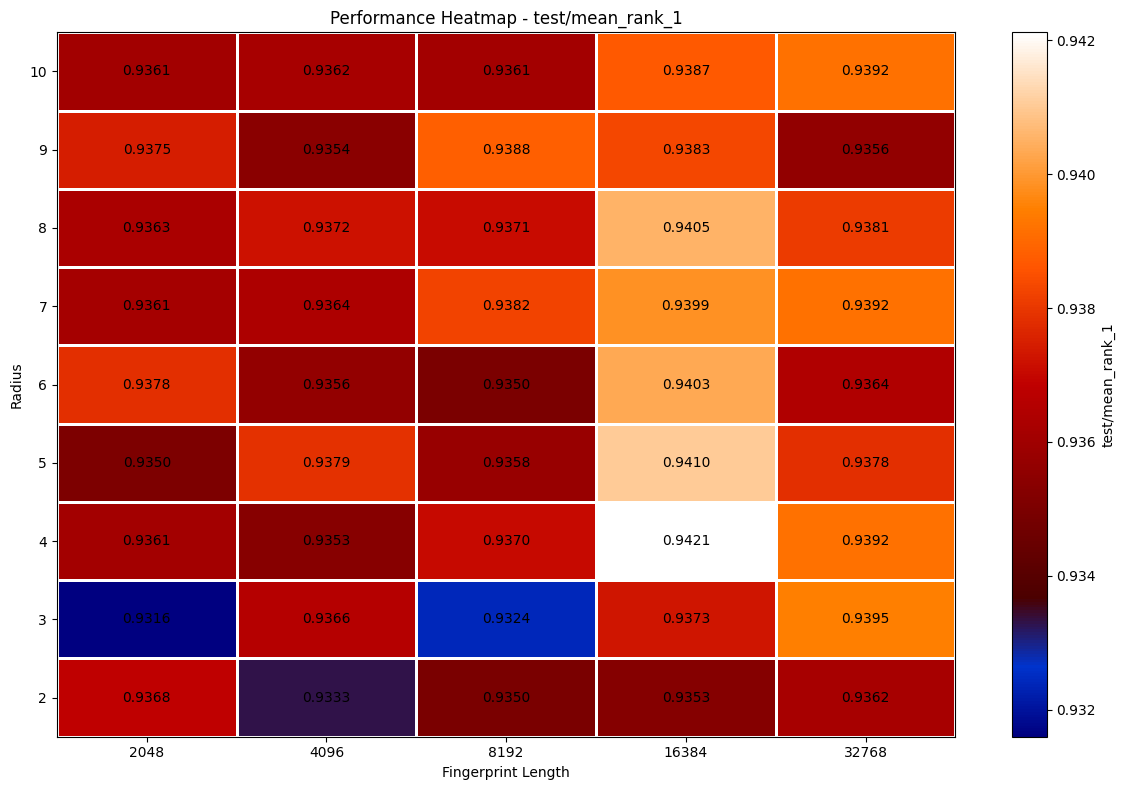

In [15]:

fig = draw_performance_heatmap(avg_results, 'test/mean_rank_1')
plt.show()

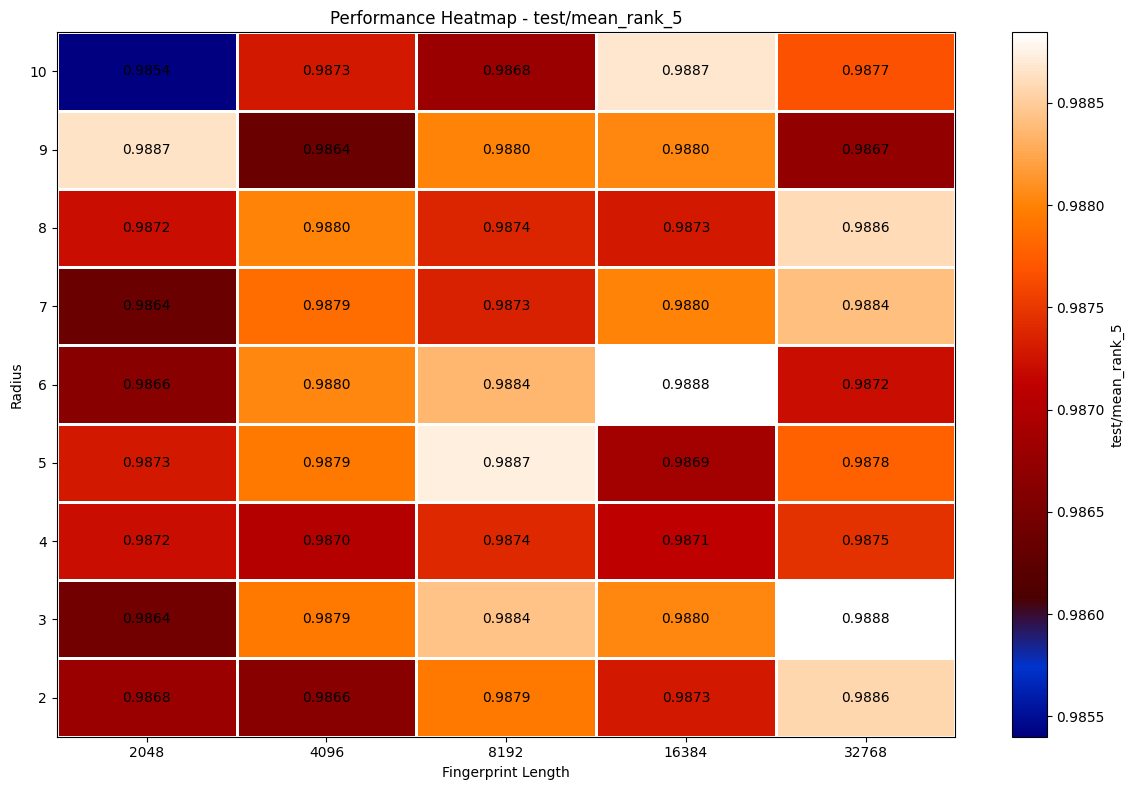

In [16]:

fig = draw_performance_heatmap(avg_results, 'test/mean_rank_5')
plt.show()

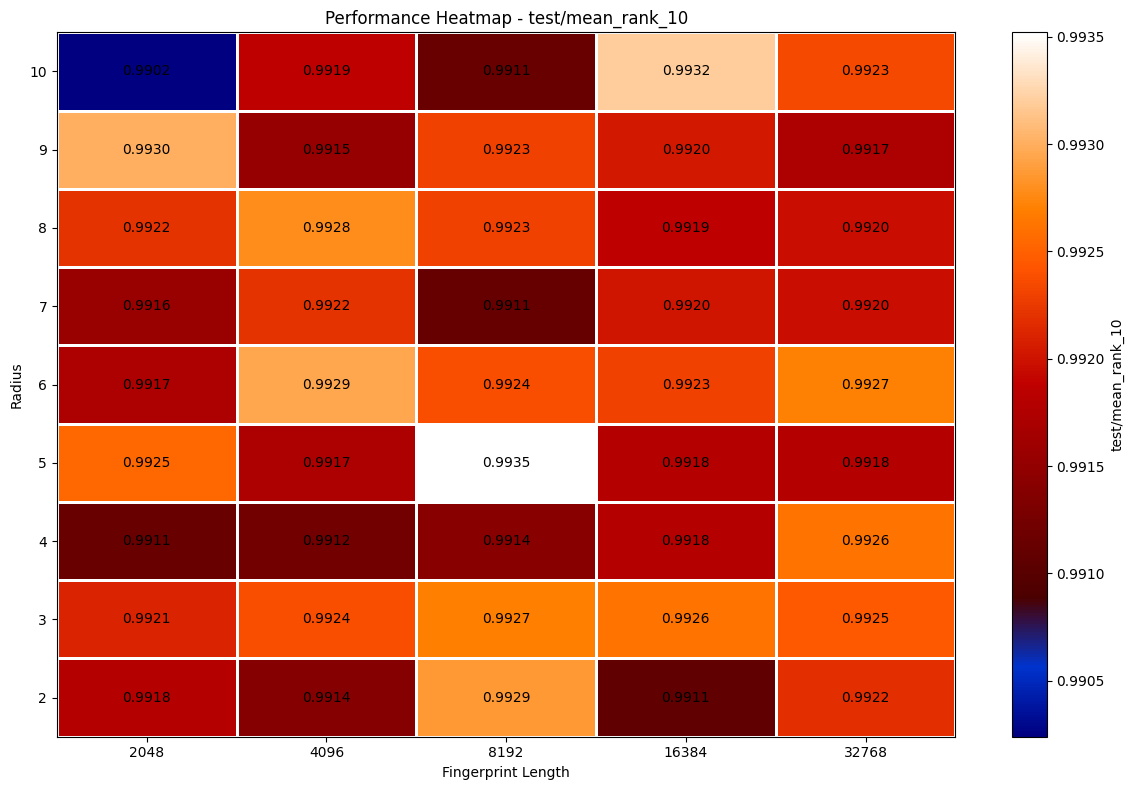

In [17]:
fig = draw_performance_heatmap(avg_results, 'test/mean_rank_10')
plt.show()

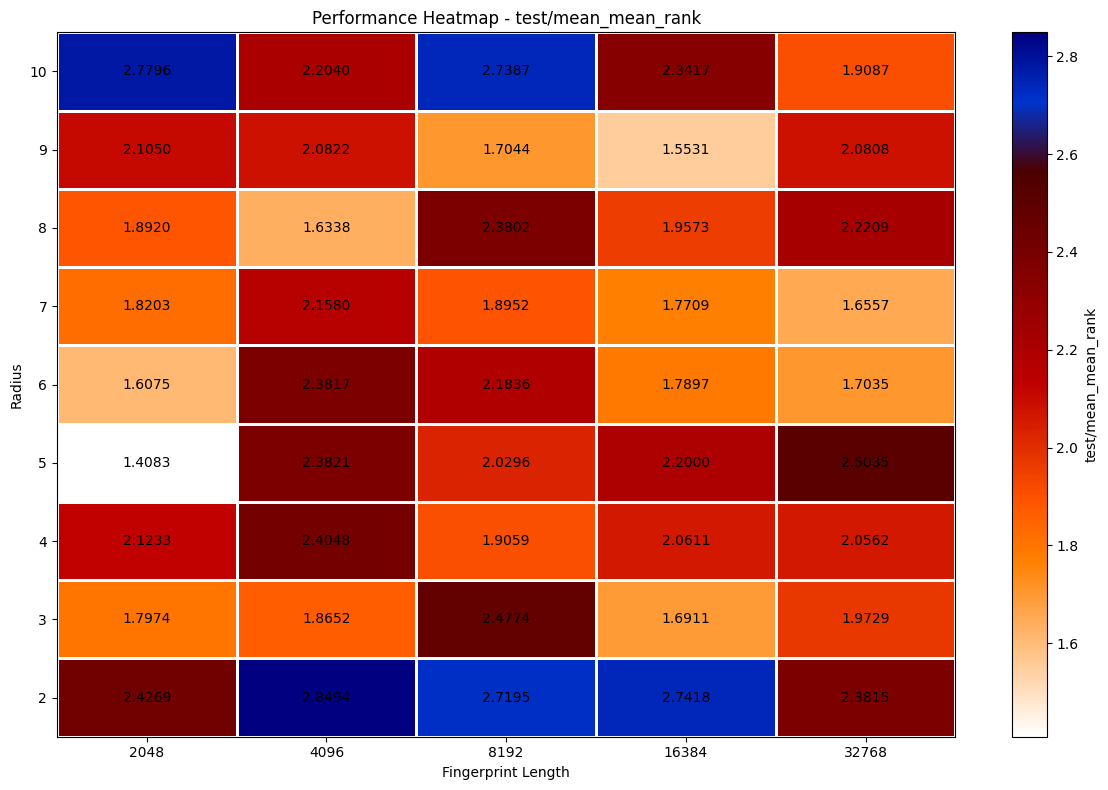

In [18]:
fig = draw_performance_heatmap(avg_results, 'test/mean_mean_rank', reverse_color=True)
plt.show()

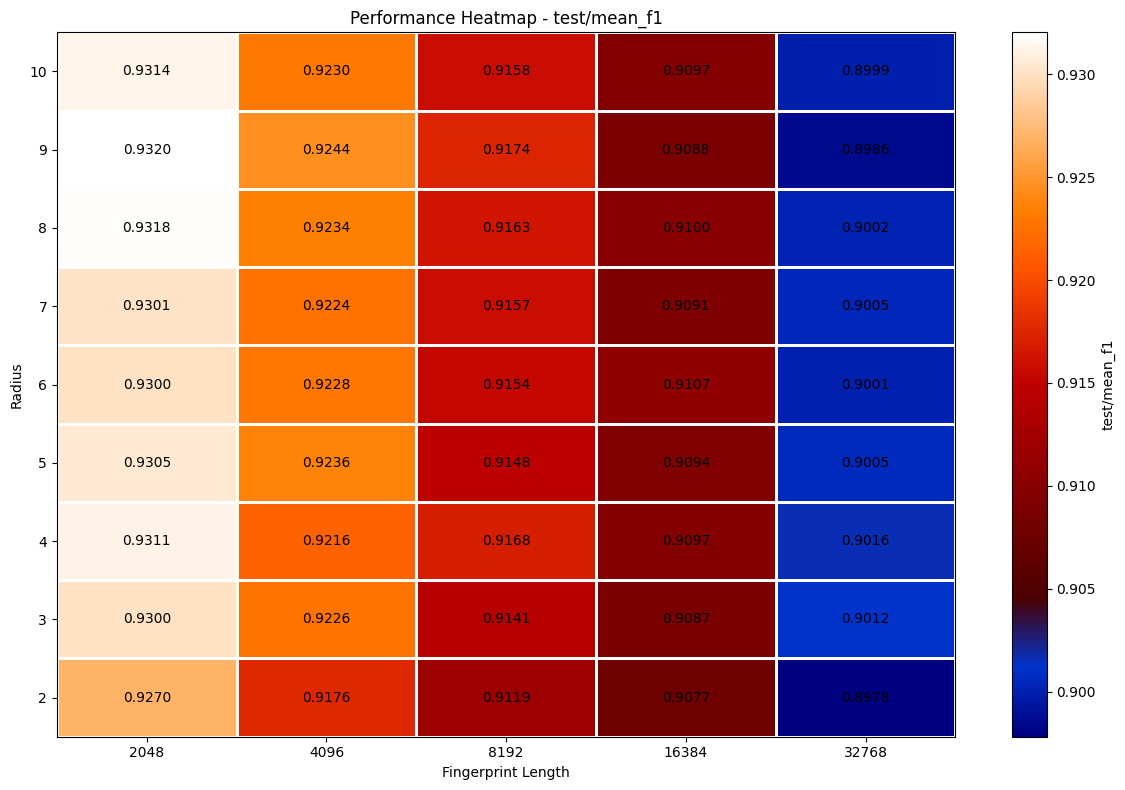

In [19]:
fig = draw_performance_heatmap(avg_results, 'test/mean_f1', reverse_color=False)
plt.show()

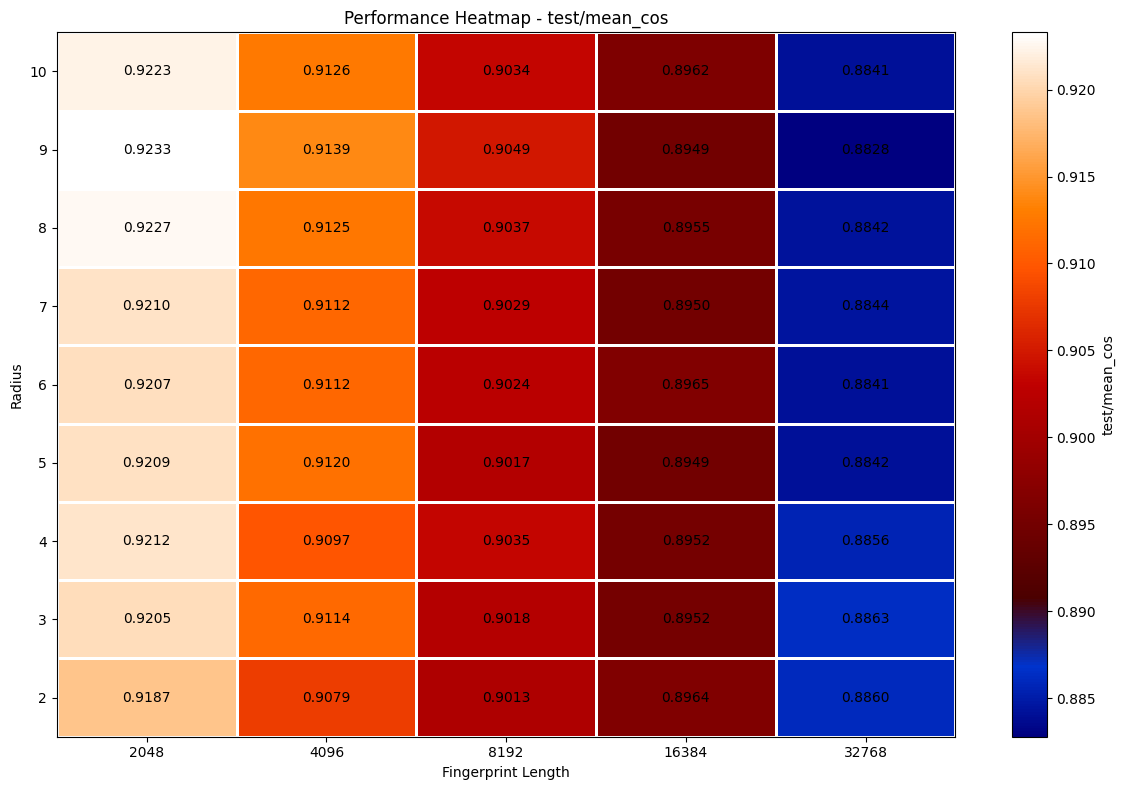

In [20]:
fig = draw_performance_heatmap(avg_results, 'test/mean_cos', reverse_color=False)
plt.show()